In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.shock_simulator import ShockSimulator
from marketsim.fourheap.constants import BUY, SELL
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Figure 6.9.a - pg71

Notes: 
- some parameters left to interpretation
- doing both sides of shock for completeness
- Max difference
- scale on the graph is odd
- wont be able to achieve the straight line they did, why log scale?

Sell Side Shock:

In [2]:
%%time

plot_no_trend = {}
plot_trend = {}

for volatility in [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    print(f"volatility: {volatility}")
    for seed in range(120, 140):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        max_diff_nt = 0

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            max_diff_nt = max(max_diff_nt, abs(f[times_no_trend[i]] - prices_no_trend[i]))

        
        if volatility not in plot_no_trend.keys():
            plot_no_trend[volatility] = 0

        plot_no_trend[volatility] += max_diff_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        max_diff_t = 0

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            max_diff_t = max(max_diff_t, abs(f[times_trend[i]] - prices_trend[i]))

        if volatility not in plot_trend.keys():
            plot_trend[volatility] = 0

        plot_trend[volatility] += max_diff_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 20)


X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 20)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Max Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.a/"

# save plot
plt.savefig(base + f"6.9.a_SELL.png")


volatility: 10
    Seed: 120
    Seed: 121
    Seed: 122
    Seed: 123
    Seed: 124
    Seed: 125
    Seed: 126
    Seed: 127
    Seed: 128
    Seed: 129
    Seed: 130
    Seed: 131
    Seed: 132
    Seed: 133
    Seed: 134
    Seed: 135
    Seed: 136
    Seed: 137
    Seed: 138
    Seed: 139
volatility: 50
    Seed: 120
    Seed: 121
    Seed: 122
    Seed: 123
    Seed: 124
    Seed: 125
    Seed: 126
    Seed: 127
    Seed: 128
    Seed: 129
    Seed: 130
    Seed: 131
    Seed: 132
    Seed: 133
    Seed: 134
    Seed: 135
    Seed: 136
    Seed: 137
    Seed: 138
    Seed: 139
volatility: 100
    Seed: 120
    Seed: 121
    Seed: 122
    Seed: 123
    Seed: 124
    Seed: 125
    Seed: 126
    Seed: 127
    Seed: 128
    Seed: 129
    Seed: 130
    Seed: 131
    Seed: 132
    Seed: 133
    Seed: 134
    Seed: 135
    Seed: 136
    Seed: 137
    Seed: 138
    Seed: 139
volatility: 200
    Seed: 120
    Seed: 121
    Seed: 122
    Seed: 123
    Seed: 124
    Seed: 125
    Seed: 126


Buy Side Shock: 

volatility: 10
    Seed: 120
    Seed: 121
    Seed: 122
    Seed: 123
    Seed: 124
    Seed: 125
    Seed: 126
    Seed: 127
    Seed: 128
    Seed: 129
    Seed: 130
    Seed: 131
    Seed: 132
    Seed: 133
    Seed: 134
    Seed: 135
    Seed: 136
    Seed: 137
    Seed: 138
    Seed: 139
volatility: 50
    Seed: 120
    Seed: 121
    Seed: 122
    Seed: 123
    Seed: 124
    Seed: 125
    Seed: 126
    Seed: 127
    Seed: 128
    Seed: 129
    Seed: 130
    Seed: 131
    Seed: 132
    Seed: 133
    Seed: 134
    Seed: 135
    Seed: 136
    Seed: 137
    Seed: 138
    Seed: 139
volatility: 100
    Seed: 120
    Seed: 121
    Seed: 122
    Seed: 123
    Seed: 124
    Seed: 125
    Seed: 126
    Seed: 127
    Seed: 128
    Seed: 129
    Seed: 130
    Seed: 131
    Seed: 132
    Seed: 133
    Seed: 134
    Seed: 135
    Seed: 136
    Seed: 137
    Seed: 138
    Seed: 139
volatility: 200
    Seed: 120
    Seed: 121
    Seed: 122
    Seed: 123
    Seed: 124
    Seed: 125
    Seed: 126


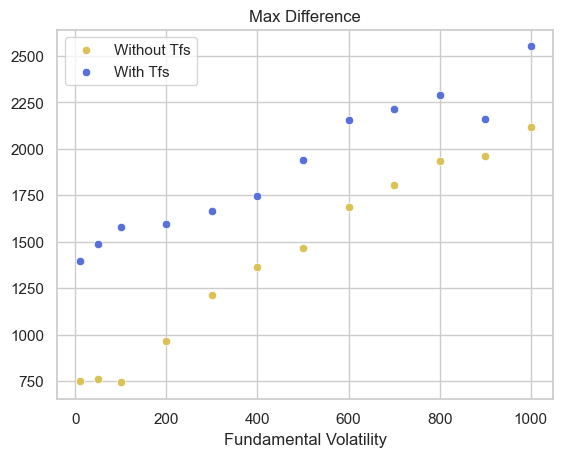

In [ ]:
%%time

plot_no_trend = {}
plot_trend = {}

for volatility in [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    print(f"volatility: {volatility}")
    for seed in range(120, 140):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        max_diff_nt = 0

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            max_diff_nt = max(max_diff_nt, abs(f[times_no_trend[i]] - prices_no_trend[i]))

        
        if volatility not in plot_no_trend.keys():
            plot_no_trend[volatility] = 0

        plot_no_trend[volatility] += max_diff_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        max_diff_t = 0

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            max_diff_t = max(max_diff_t, abs(f[times_trend[i]] - prices_trend[i]))

        if volatility not in plot_trend.keys():
            plot_trend[volatility] = 0

        plot_trend[volatility] += max_diff_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 20)
   
X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 20)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Max Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.a/"

# save plot
plt.savefig(base + f"6.9.a_BUY.png")


Figure 6.9.b - pg 71

Notes: 
- some parameters left to interpretation
- doing both sides of shock for completeness
- Mispricing

Sell Side Shocks: 

volatility: 10
    Seed: 200
    Seed: 201
    Seed: 202
    Seed: 203
    Seed: 204
    Seed: 205
    Seed: 206
    Seed: 207
    Seed: 208
    Seed: 209
    Seed: 210
    Seed: 211
    Seed: 212
    Seed: 213
    Seed: 214
    Seed: 215
    Seed: 216
    Seed: 217
    Seed: 218
    Seed: 219
volatility: 50
    Seed: 200
    Seed: 201
    Seed: 202
    Seed: 203
    Seed: 204
    Seed: 205
    Seed: 206
    Seed: 207
    Seed: 208
    Seed: 209
    Seed: 210
    Seed: 211
    Seed: 212
    Seed: 213
    Seed: 214
    Seed: 215
    Seed: 216
    Seed: 217
    Seed: 218
    Seed: 219
volatility: 100
    Seed: 200
    Seed: 201
    Seed: 202
    Seed: 203
    Seed: 204
    Seed: 205
    Seed: 206
    Seed: 207
    Seed: 208
    Seed: 209
    Seed: 210
    Seed: 211
    Seed: 212
    Seed: 213
    Seed: 214
    Seed: 215
    Seed: 216
    Seed: 217
    Seed: 218
    Seed: 219
volatility: 200
    Seed: 200
    Seed: 201
    Seed: 202
    Seed: 203
    Seed: 204
    Seed: 205
    Seed: 206


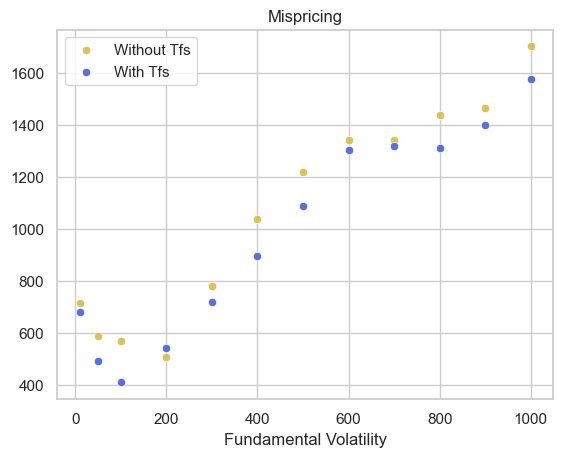

In [ ]:
%%time

plot_no_trend = {}
plot_trend = {}

for volatility in [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    print(f"volatility: {volatility}")
    for seed in range(200, 220):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[1000, 1500],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = SELL,
                L = 8,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )
        
        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

      
        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)

        # print(f"volatilty: {seed} {rmsd_nt} nt")
        # if rmsd_nt > 10000:
        #     print(f"    {squared_diff_nt}")
       
        if volatility not in plot_no_trend.keys():
            plot_no_trend[volatility] = 0

        plot_no_trend[volatility] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[1000, 1500],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = SELL,
                L = 8,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if volatility not in plot_trend.keys():
            plot_trend[volatility] = 0

        plot_trend[volatility] += rmsd_t
        # print(f"volatilty: {seed} {rmsd_t}")
        # if rmsd_t > 10000:
        #     print(f"    {squared_diff_t}")


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 20)


X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 20)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.b/"

# save plot
plt.savefig(base + f"6.9.b_SELL_oop.png")


Buy Side Shocks: 

volatility: 10
    Seed: 160
    Seed: 161
    Seed: 162
    Seed: 163
    Seed: 164
    Seed: 165
    Seed: 166
    Seed: 167
    Seed: 168
    Seed: 169
    Seed: 170
    Seed: 171
    Seed: 172
    Seed: 173
    Seed: 174
    Seed: 175
    Seed: 176
    Seed: 177
    Seed: 178
    Seed: 179
volatility: 50
    Seed: 160
    Seed: 161
    Seed: 162
    Seed: 163
    Seed: 164
    Seed: 165
    Seed: 166
    Seed: 167
    Seed: 168
    Seed: 169
    Seed: 170
    Seed: 171
    Seed: 172
    Seed: 173
    Seed: 174
    Seed: 175
    Seed: 176
    Seed: 177
    Seed: 178
    Seed: 179
volatility: 100
    Seed: 160
    Seed: 161
    Seed: 162
    Seed: 163
    Seed: 164
    Seed: 165
    Seed: 166
    Seed: 167
    Seed: 168
    Seed: 169
    Seed: 170
    Seed: 171
    Seed: 172
    Seed: 173
    Seed: 174
    Seed: 175
    Seed: 176
    Seed: 177
    Seed: 178
    Seed: 179
volatility: 200
    Seed: 160
    Seed: 161
    Seed: 162
    Seed: 163
    Seed: 164
    Seed: 165
    Seed: 166


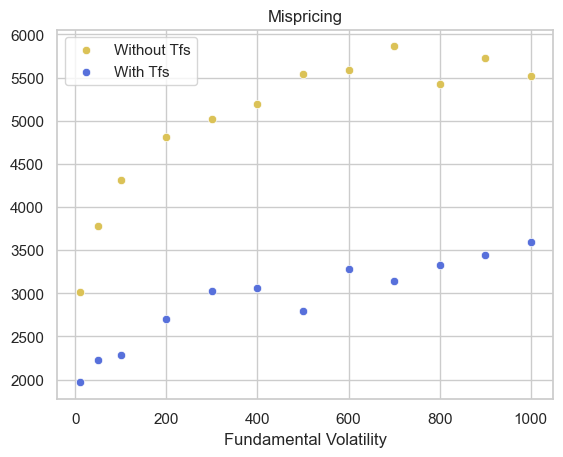

In [ ]:
%%time

plot_no_trend = {}
plot_trend = {}

for volatility in [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    print(f"volatility: {volatility}")
    for seed in range(160, 180):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[1000, 1500],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = BUY,
                L = 8,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )
        
        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

      
        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
       
        if volatility not in plot_no_trend.keys():
            plot_no_trend[volatility] = 0

        plot_no_trend[volatility] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = volatility,
                q_max = 10,
                pv_var = 1e6,
                shade=[1000, 1500],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 50,
                shock_side = BUY,
                L = 8,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if volatility not in plot_trend.keys():
            plot_trend[volatility] = 0

        plot_trend[volatility] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 20)


X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 20)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.9.b/"

# save plot
plt.savefig(base + f"6.9.b_BUY_oop.png")


Figure 6.10.a - Pg 72

Notes: 
- Generating for both buy side and sell side shocks
- average max diference over 10 seeds
- inferring what the interval is, it not defined

Sell Side Shocks: 

obs_var: 1000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 2500000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 5000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 7500000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 10000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
CPU times: user 3min 1s, sys: 32.4 s, total: 3min 34s
Wall time: 1min 23s


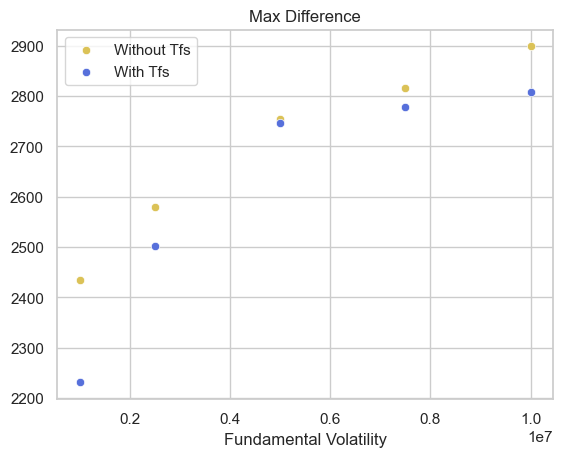

In [ ]:
%%time

plot_no_trend = {}
plot_trend = {}

for obs_var in [1e6,2.5e6, 5e6, 7.5e6, 1e7]:
    print(f"obs_var: {obs_var}")
    for seed in range(20, 25):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        max_diff_nt = 0

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            max_diff_nt = max(max_diff_nt, abs(f[times_no_trend[i]] - prices_no_trend[i]))

        
        if obs_var not in plot_no_trend.keys():
            plot_no_trend[obs_var] = 0

        plot_no_trend[obs_var] += max_diff_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        max_diff_t = 0

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            max_diff_t = max(max_diff_t, abs(f[times_trend[i]] - prices_trend[i]))

        if obs_var not in plot_trend.keys():
            plot_trend[obs_var] = 0

        plot_trend[obs_var] += max_diff_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 5)


X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 5)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Max Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.10.a/"

# save plot
plt.savefig(base + f"6.10.a_SELL.png")


obs_var: 1000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 2500000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 5000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 7500000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
obs_var: 10000000.0
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
CPU times: user 2min 58s, sys: 33.3 s, total: 3min 31s
Wall time: 1min 25s


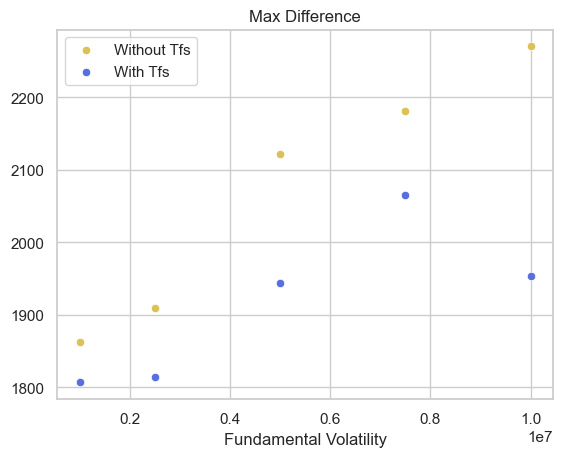

In [ ]:
%%time

plot_no_trend = {}
plot_trend = {}

for obs_var in [1e6,2.5e6, 5e6, 7.5e6, 1e7]:
    print(f"obs_var: {obs_var}")
    for seed in range(20, 25):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        max_diff_nt = 0

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            max_diff_nt = max(max_diff_nt, abs(f[times_no_trend[i]] - prices_no_trend[i]))

        
        if obs_var not in plot_no_trend.keys():
            plot_no_trend[obs_var] = 0

        plot_no_trend[obs_var] += max_diff_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        max_diff_t = 0

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            max_diff_t = max(max_diff_t, abs(f[times_trend[i]] - prices_trend[i]))

        if obs_var not in plot_trend.keys():
            plot_trend[obs_var] = 0

        plot_trend[obs_var] += max_diff_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():
    X_nt.append(k)
    Y_nt.append(v / 5)


X_t = []
Y_t = []

for k, v in plot_trend.items():
    X_t.append(k)
    Y_t.append(v / 5)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Fundamental Volatility')
plt.ylabel('')
plt.title('Max Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.10.a/"

# save plot
plt.savefig(base + f"6.10.a_BUY.png")


Figure 6.10.b - Pg 72

Notes: 
- Generating for both buy side and sell side shocks
- average max diference over 5 seeds
- inferring what the interval is, it not defined

obs_var: 1000000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
    Seed: 105
    Seed: 106
    Seed: 107
    Seed: 108
    Seed: 109
    Seed: 110
    Seed: 111
    Seed: 112
    Seed: 113
    Seed: 114
    Seed: 115
    Seed: 116
    Seed: 117
    Seed: 118
    Seed: 119
obs_var: 2500000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
    Seed: 105
    Seed: 106
    Seed: 107
    Seed: 108
    Seed: 109
    Seed: 110
    Seed: 111
    Seed: 112
    Seed: 113
    Seed: 114
    Seed: 115
    Seed: 116
    Seed: 117
    Seed: 118
    Seed: 119
obs_var: 5000000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
    Seed: 105
    Seed: 106
    Seed: 107
    Seed: 108
    Seed: 109
    Seed: 110
    Seed: 111
    Seed: 112
    Seed: 113
    Seed: 114
    Seed: 115
    Seed: 116
    Seed: 117
    Seed: 118
    Seed: 119
obs_var: 7500000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
    Seed: 105


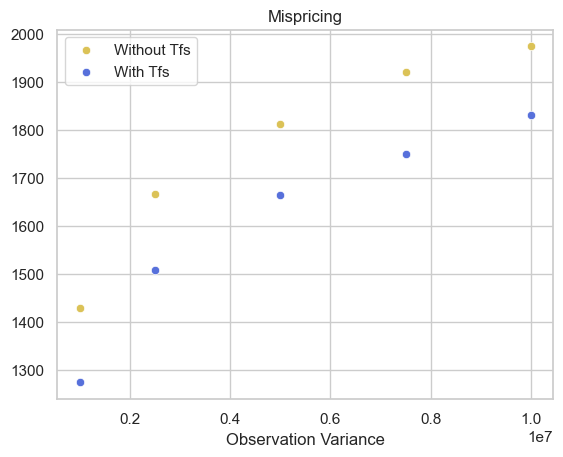

In [ ]:
%%time

plot_no_trend = {}
plot_trend = {}

for obs_var in [1e6,2.5e6, 5e6, 7.5e6, 1e7]:
    print(f"obs_var: {obs_var}")
    for seed in range(100, 120):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )
        
        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

      
        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
       
        if obs_var not in plot_no_trend.keys():
            plot_no_trend[obs_var] = 0

        plot_no_trend[obs_var] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if obs_var not in plot_trend.keys():
            plot_trend[obs_var] = 0

        plot_trend[obs_var] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 20)
    # print(k , v)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 20)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Observation Variance')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.10.b/"

# save plot
plt.savefig(base + f"6.10.b_SELL.png")


obs_var: 1000000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
    Seed: 105
    Seed: 106
    Seed: 107
    Seed: 108
    Seed: 109
    Seed: 110
    Seed: 111
    Seed: 112
    Seed: 113
    Seed: 114
    Seed: 115
    Seed: 116
    Seed: 117
    Seed: 118
    Seed: 119
obs_var: 2500000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
    Seed: 105
    Seed: 106
    Seed: 107
    Seed: 108
    Seed: 109
    Seed: 110
    Seed: 111
    Seed: 112
    Seed: 113
    Seed: 114
    Seed: 115
    Seed: 116
    Seed: 117
    Seed: 118
    Seed: 119
obs_var: 5000000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
    Seed: 105
    Seed: 106
    Seed: 107
    Seed: 108
    Seed: 109
    Seed: 110
    Seed: 111
    Seed: 112
    Seed: 113
    Seed: 114
    Seed: 115
    Seed: 116
    Seed: 117
    Seed: 118
    Seed: 119
obs_var: 7500000.0
    Seed: 100
    Seed: 101
    Seed: 102
    Seed: 103
    Seed: 104
    Seed: 105


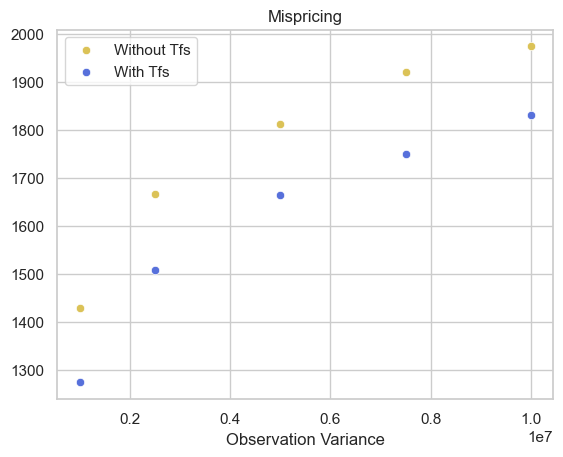

In [ ]:
%%time

plot_no_trend = {}
plot_trend = {}

for obs_var in [1e6,2.5e6, 5e6, 7.5e6, 1e7]:
    print(f"obs_var: {obs_var}")
    for seed in range(100, 120):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )
        
        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

      
        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
       
        if obs_var not in plot_no_trend.keys():
            plot_no_trend[obs_var] = 0

        plot_no_trend[obs_var] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = obs_var,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e3,
                shock_entry_time = 5000,
                shock_interval = 125,
                shock_volume = 50,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if obs_var not in plot_trend.keys():
            plot_trend[obs_var] = 0

        plot_trend[obs_var] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 20)
    # print(k , v)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 20)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Observation Variance')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.10.b/"

# save plot
plt.savefig(base + f"6.10.b_BUY.png")
